# **UVOD U ZNANOST O PODACIMA**



Cilj projekta bio je pripremiti podatke, vizualizirati, replicirati i poboljšati rezultate znanstvenog članka "Implementation of Machine Learning Model to Predict Heart Failure Disease", koji se može naći na ovoj poveznici:https://pdfs.semanticscholar.org/a74f/d8c51251e8c6126a1527e545bd78860a10f9.pdf .



# **1.Priprema i vizualizacija podataka**

Podatkovni skup korišten pri implementaciji ovog projekta je "Heart Disease Cleveland UCI" , dostupan na poveznici: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci .

Prvi korak nam je bio učitati sve potrebne *library*-e i učitati naš podatkovni skup.

In [50]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files
#import io
#uploaded = files.upload()

In [51]:
X = pd.read_csv('C:/Users/korisnik/Downloads/archive/heart_cleveland_upload.csv')


### Početni pregled podataka
Prvo ćemo pogledati ukratko izgled skupa podataka,atribute,broj podataka i slično.

In [52]:
print(X.shape)
print(X.columns.values)

(297, 14)
['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'condition']



**Opis značajki:**

*  age - starost - [29, 77]
*   sex - spol - (0,1)


*   cp - jačina boli u prsima - [0, 3]
*   trestbps - krvni tlak -  [94, 200]

*   chol - razina kolesterola - [126, 564]
*   fbs - razina glukoze u krvi -(0,1)

*   restecg - rezultat ECG testiranja - [0, 2]
*   thalach - maksimalna vrijednost otkucaja srca u vrijeme prijema pacijenta - [71, 202]


*   exang - indikator angine - (0,1)
*   oldpeak - razina depresije -  [0, 6.2]

*   slope - stanje pacijenta za vrijeme vrhunca vježbe - [1, 3]
*   ca - status fluoroskopije -  [0, 3]


*   thal - rezultat Thalliumovog testa -  [0, 3]
*   condition -oznaka ima li pacijent šansu da dobije zastoj srca - (0,1)















In [53]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


### Stršeći podatci

In [54]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Pomoću gornje tablice možemo vidjeti koji su kandidati za stršeće vrijednosti.  To su varijable "chol" , i "oldpeak". Temeljem ovog ispisa kandidat za stršeće podatke je oldpeak. Njegove maksimalne vrijednosti dosta odskaču, ali nisu nemoguće. Pogledajmo dodatno značajku oldpeak.

In [55]:
print('oldpeak > 1: ', (X.oldpeak > 1).sum())
print('oldpeak > 2: ', (X.oldpeak > 2).sum())
print('oldpeak > 3: ', (X.oldpeak > 3).sum())
print('oldpeak > 4: ', (X.oldpeak > 4).sum())
print('oldpeak > 5: ', (X.oldpeak > 5).sum())
print('oldpeak > 6: ', (X.oldpeak > 6).sum())

oldpeak > 1:  123
oldpeak > 2:  50
oldpeak > 3:  20
oldpeak > 4:  5
oldpeak > 5:  2
oldpeak > 6:  1


In [56]:
X.loc[X.oldpeak > 5, 'oldpeak']

186    6.2
239    5.6
Name: oldpeak, dtype: float64

Ova 2 zapisa jako odudaraju od ostalih zapisa i mogu se smatrati stršećim vrijednostima. 
Dobar način detekcije stršećih vrijednosti su vizualizacije, a to ćemo vidjeti kasnije.

### Monotoni atributi
Provjerimo postoje li monotoni atributi, odnosno atributi čija vrijednost jednoliko raste.

In [57]:
X.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

Funkcija nunique broji jedinstvene vrijednosti po stupcima i može služiti kao dobar indikator monotonih atributa. U ovom slučaju nemamo kandidate za monotone atribute.

### Nedostajući podatci

In [58]:
X.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Vidimo da podaci ne sadrže nedostajuće vrijednosti te iz tog razloga nije potrebno provoditi nikakve preinake.

## Histogram

Histogrami su grafovi koji prikazuju odnose pojedinačne varijable. Odabrali smo 3 značajke iz podatkovnog skupa, *age*,*thalach* i *oldpek*, te za njih nacrtali histograme.

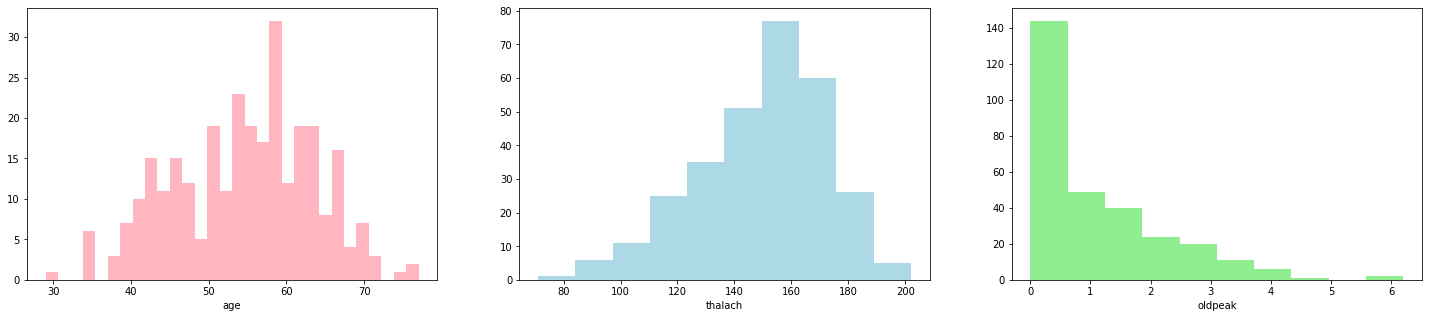

In [59]:
plt.figure(figsize=(25,5)) 
plt.subplot(1,3,1)
plt.hist(X.age, bins=30,color='lightpink')
plt.xlabel('age')
plt.subplot(1,3,2)
plt.hist(X.thalach,color='lightblue')
plt.xlabel('thalach')
plt.subplot(1,3,3)
plt.hist(X.oldpeak,color='lightgreen')
plt.xlabel('oldpeak')

plt.show()

Iz prvog histograma vidimo kako je večina ispitanika starije životne dobi, najviše ispitanika ima oko 60 godina.

Iz drugog histograma možemo vidjeti kako najviše ispitanika ima maksimalnu vrijednost oko 160 otkucaja srca

I iz trećeg histograma možemo vidjeti kako je najučestalija razina depresije između 0 i 0.5

##Pitni graf

Služi za prikaz pojedinih kategoričkih varijabli. Prikazuje relativni odnos broja primjeraka pojedinih kategorija određene varijable.
 U našem slučaju imamo numeričke, ali se mogu interpretirati kategorički.

*   cp: chest pain type -- Value 0: typical angina -- Value 1: atypical angina -- Value 2: non-anginal pain -- Value 3: asymptomatic
*   slope: the slope of the peak exercise ST segment -- Value 0: upsloping -- Value 1: flat -- Value 2: downsloping



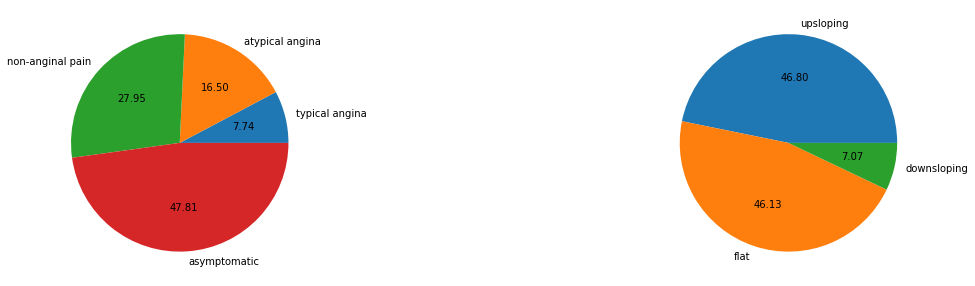

In [60]:
plt.figure(figsize=(20,5)) 
plt.subplot(1,2,1)
count_per_title = X.groupby('cp').count().loc[:,'sex'].values
percent = (count_per_title/len(X))*100
value = X.groupby('cp').count().index.values
plt.pie(percent,labels=["typical angina","atypical angina","non-anginal pain","asymptomatic"],autopct='%.2f')
plt.subplot(1,2,2)
count_per_title = X.groupby('slope').count().loc[:,'sex'].values
percent = (count_per_title/len(X))*100
value = X.groupby('slope').count().index.values
plt.pie(percent,labels=["upsloping","flat","downsloping"],autopct='%.2f')
plt.show()

Iz prvog pitnog grafa vidimo kako najviše ispitanika ne osjete bol u prsima, a najmanje ispitanika ima tipičnu anginu.
 
Iz drugog pitnog grafa *upsloping* i *flat* se čine podjednako prisutni kod ispitanika,ali *upsloping* za 0.67 učestaliji.

##Posloženi dijagram

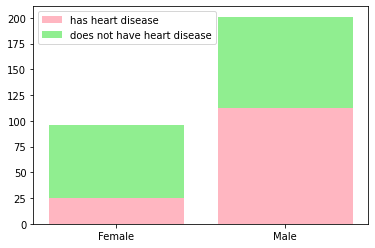

In [61]:
# mask
mask_condition = X.condition == 1

count_neg = X.loc[~mask_condition,:].groupby('sex').count().loc[:,'age'].values
count_pos = X.loc[mask_condition,:].groupby('sex').count().loc[:,'age'].values
sex = X.groupby('sex').count().index.values

plt.bar(sex, count_pos, color='lightpink', label='has heart disease')
plt.bar(sex, count_neg, color='lightgreen', label='does not have heart disease', bottom=count_pos)
plt.xticks([0,1],['Female', 'Male'])
plt.legend(loc='best')
plt.show()

Iz posloženog dijagrama vidimo kako muški ispitanici su podložniji srčanim manama.

##Kutijasti graf

Kutijasti dijagrami se koriste prilikom vizualizacije jedne numeričke varijable. Pomoću njih je najlakše uočiti stršeće vrijednosti.

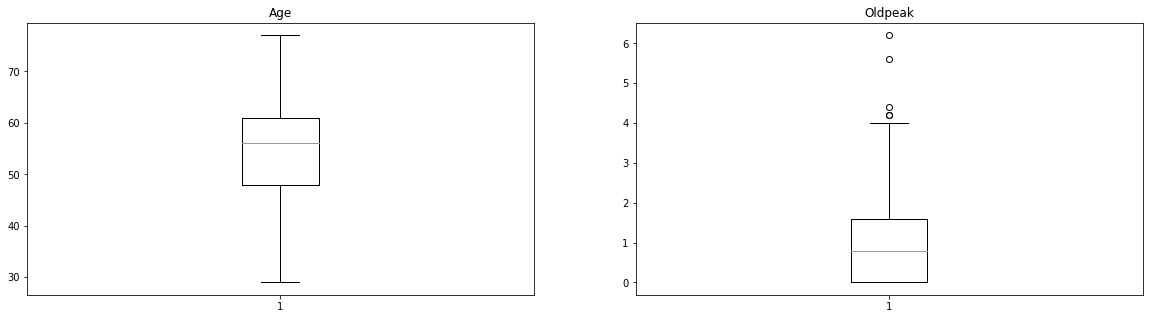

In [62]:
plt.figure(figsize=(20,5)) 
plt.subplot(1,2,1)
plt.boxplot(X.age)
plt.title("Age")
plt.subplot(1,2,2)
plt.boxplot(X.oldpeak)
plt.title("Oldpeak")
plt.show()

Vidimo na box plot dijagramu da godine nemaju toliko stršećih vrijednosti i vidimo da je medijan malo iznad polovice. Na box plotu za oldpeak se lijepo vide stršeće vrijednosti koje smo već komentirali prethodno. 

## Graf raspršenja

Služi za prikaz odnosa dviju numeričkih varijabli.

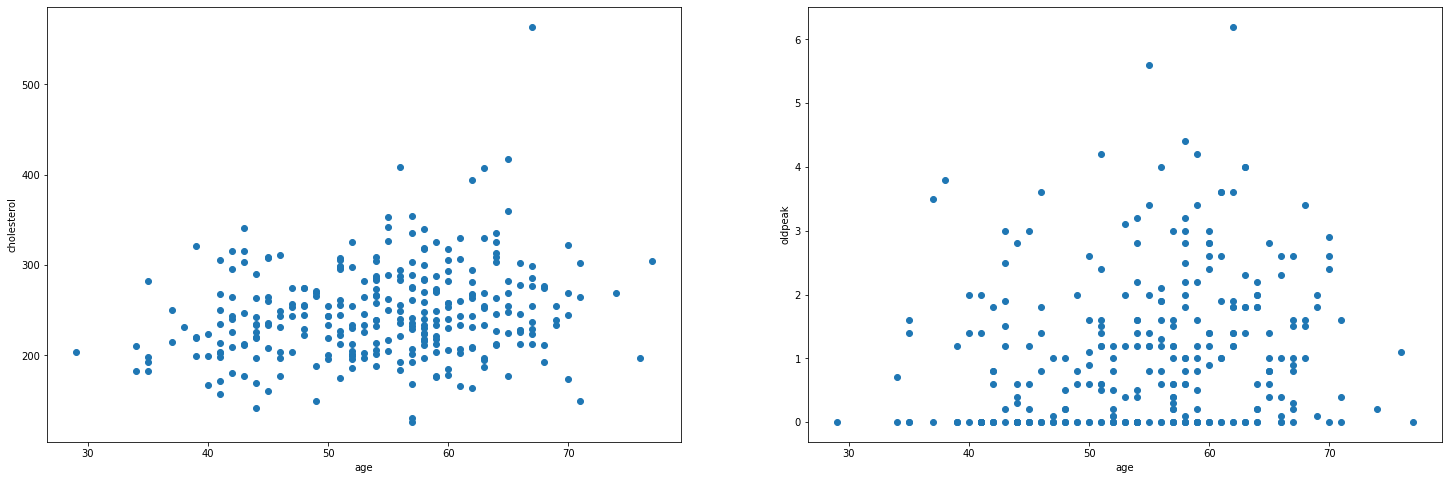

In [63]:
plt.figure(figsize=(25,8)) 
plt.subplot(1,2,1)
plt.scatter(X.age, X.chol)
plt.xlabel("age")
plt.ylabel("cholesterol")
plt.subplot(1,2,2)
plt.scatter(X.age, X.oldpeak)
plt.xlabel("age")
plt.ylabel("oldpeak")
plt.show()

Pomoću gornjih grafova možemo vidjeti kako se mijenjaju razine kolesterola i razina depresije s godinama. Podaci su poprilično raspršeni te možemo zaključiti da na temelju godina ispitanika ne možemo predviditi ni kolesterol ni razinu depresije.

##Toplinska mapa
Toplinske karte vizualiziraju podatke kroz varijacije u bojama. Toplinske karte su dobre za prikazivanje varijance između više varijabli, otkrivanje bilo kakvih obrazaca, prikazivanje jesu li neke varijable slične jedna drugoj i za otkrivanje postoje li korelacije.

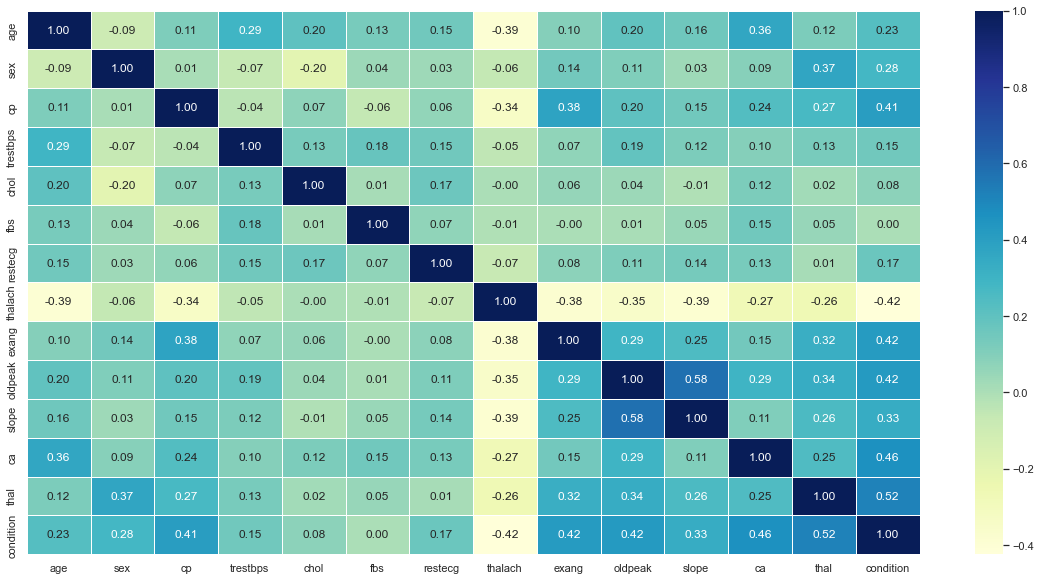

In [64]:
X_numeric = X
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_numeric.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

Vidimo kako toplinskoj mapi nema velikih vrijednosti osim na dijagonali što je i predviđeno ponašanje. Kako nema velikih vrijednosti može se zaključiti kako značajke nisu kolinearne.

# **2. Replikacija rezultata**

Dokazali smo da u našem podatkovnom skupu nema nedostajućih vrijednosti, stršećih vrijednosti, multikolinearnosti ili monotonosti, te zbog toga možemo početi s povećanjem podatkovnog skupa i replikacijom. Prije nego krenemo s replikacijom moramo povećati broj podataka u podatkovnom skupu uz pomoć min-max algoritma kao što je spomenuto u članku. Ovaj postupak je obavezan, jer imamo premalo primjera, a ako treniramo model s malo zapisa vrlo vjerojatno ćemo ga prenaučiti. 



In [65]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from IPython.display import Image  
from six import StringIO 
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import *
from sklearn.metrics import *

###min-max algoritam
Za svaki atribut se koristi minimum i maksimum
vrijednosti, primijenjena tehnika generiranja nasumičnog broja
generirati slučajne vrijednosti za svaki stupac

In [7]:
from csv import writer
import random
# List that we want to add as a new row
x=[[] for i in range (600)]
for i in range(600):
    pom=random.random()
    min=29
    max=77
    age= int(round(min+pom*(max-min)))
    min=0
    max=1
    sex=int(round(min+pom*(max-min)))
    min=0
    max=3
    cp=int(round(min+pom*(max-min)))
    min=94
    max=200
    trestbps=int(round(min+pom*(max-min)))
    min=126
    max=564
    chol=int(round(min+pom*(max-min)))
    min=0
    max=1
    fbs=int(round(min+pom*(max-min)))
    min=0
    max=2
    restecg=int(round(min+pom*(max-min)))
    min=71
    max=202
    thalach=int(round(min+pom*(max-min)))
    min=0
    max=1
    exang=int(round(min+pom*(max-min)))
    min=0
    max=6.2
    oldpeak=round(min+pom*(max-min),1)
    min=1
    max=3
    slope=int(round(min+pom*(max-min)))
    min=0
    max=3
    ca=int(round(min+pom*(max-min)))
    min=0
    max=3
    thal=int(round(min+pom*(max-min)))
    min=0
    max=1
    condition=round(min+pom*(max-min))
    x[i] = [age, sex, cp, trestbps, chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition]
# Open our existing CSV file in append mode
# Create a file object for this file
with open('C:/Users/korisnik/Downloads/archive/heart_cleveland_upload-kopija.csv', 'a', newline='') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    for i in x:
        writer_object.writerow(i)
 
    # Close the file object
    f_object.close()

In [66]:
hcu = pd.read_csv('C:/Users/korisnik/Downloads/heart_cleveland_upload-Copy1.csv')
hcu.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [67]:
feature_cols = ['age', 'sex', 'cp', 'trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
X = hcu[feature_cols] # Features
y = hcu.condition # Target variable


Sada kada smo povećali podatkovni skup možemo učiti model. 

U članku se spominje pet algoritama pomoću za implementaciju strojnog učenja, a to su:


*   Decision Tree
*   Naïve Bayes

*   Random Forest
*   Logistic Regression

*   SVM

Mi ćemo, pored spomenutih algoritama, implementirati i KNN algoritam.

Započeti ćemo sa stablom odluke, odnosno *Decision Tree*.







## 1. Decision Tree

Stabla odlučivanja je neparametarska nadzirana metoda učenja koja se koristi za klasifikaciju i regresiju. Cilj je stvoriti model koji predviđa vrijednost ciljne varijable učenjem jednostavnih pravila odlučivanja izvedenih iz značajki podataka.

In [68]:
clf = tree.DecisionTreeClassifier()

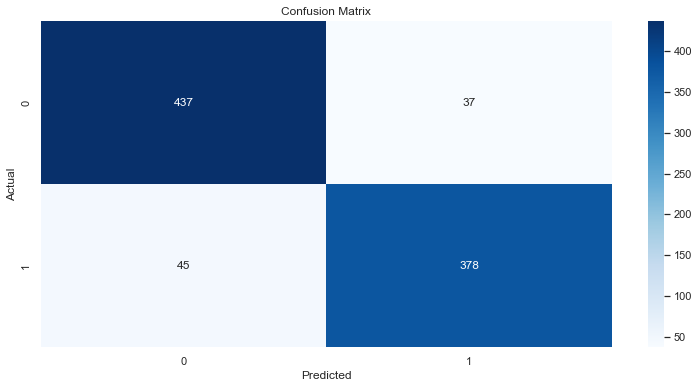

In [69]:
y_pred = cross_val_predict(clf, X, y, cv=10)
sorted_labels=[0, 1]
matrix=confusion_matrix(y, y_pred, labels=sorted_labels)

plt.figure(figsize=(12.8,6))
sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

plt.show()

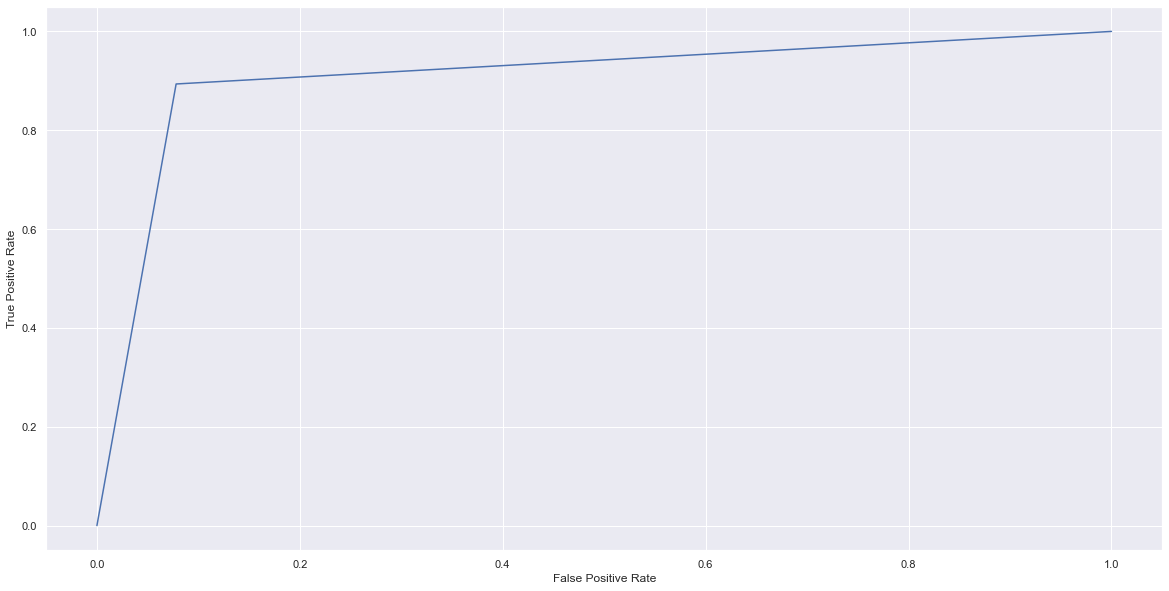

In [70]:
fpr, tpr, _ =  metrics.roc_curve(y,  y_pred)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
print("Recall Score : ",recall_score(y, y_pred, average='macro'))
print("Precision Score : ",precision_score(y, y_pred, average='macro'))
print("F1_score : ",f1_score(y, y_pred, average='macro'))
print("Accuracy Score : ",accuracy_score(y, y_pred))

Recall Score :  0.9077789747733189
Precision Score :  0.9087411888216768
F1_score :  0.9081869563914879
Accuracy Score :  0.9085841694537347


## 2. Naïve Bayes

Naivne Bayesove metode skup su algoritama nadziranog učenja koji se temelje na primjeni Bayesovog teorema uz "naivnu" pretpostavku uvjetne neovisnosti između svakog para značajki s obzirom na vrijednost varijable klase.

In [72]:
gnb = GaussianNB()

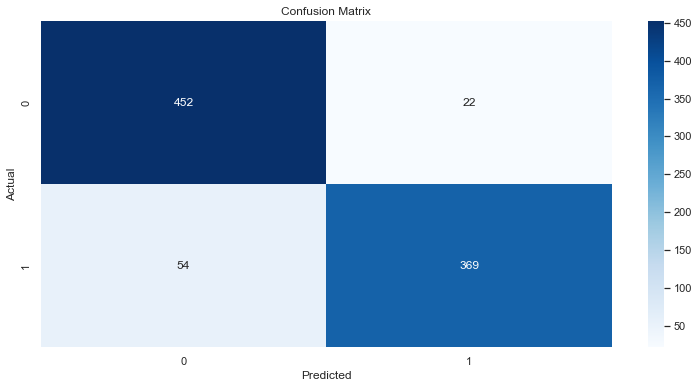

In [73]:
y_pred = cross_val_predict(gnb, X, y, cv=10)
sorted_labels=[0, 1]
matrix=confusion_matrix(y, y_pred, labels=sorted_labels)

plt.figure(figsize=(12.8,6))
sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

plt.show()

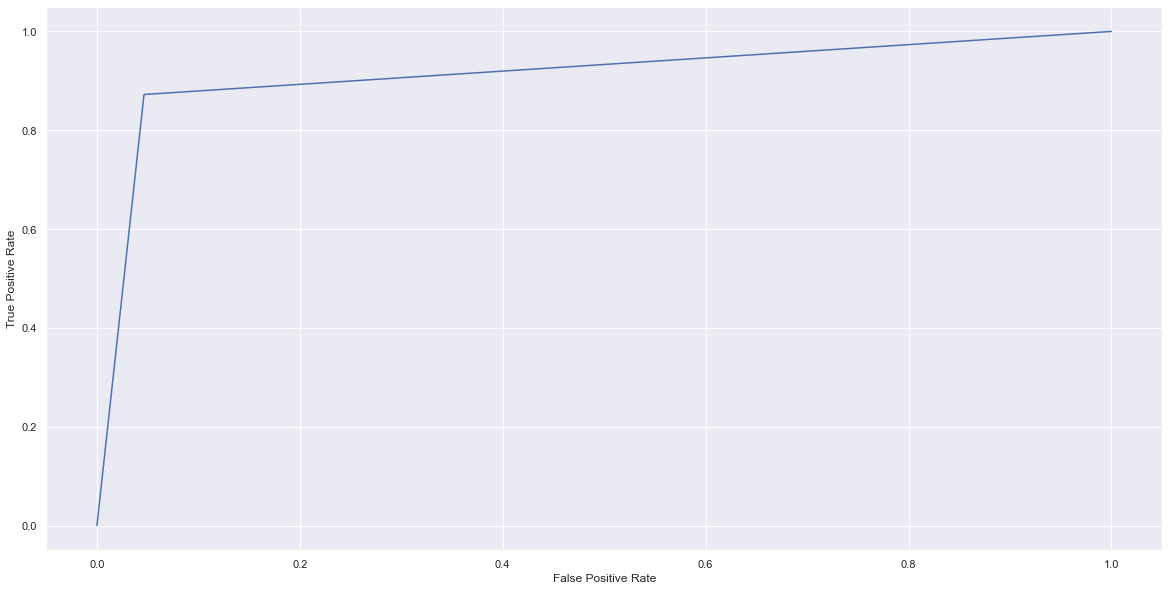

In [74]:
fpr, tpr, _ =  metrics.roc_curve(y,  y_pred)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
from sklearn.metrics import *
print("Recall Score : ",recall_score(y, y_pred, average='macro'))
print("Precision Score : ",precision_score(y, y_pred, average='macro'))
print("F1_score : ",f1_score(y, y_pred, average='macro'))
print("Accuracy Score : ",accuracy_score(y, y_pred))

Recall Score :  0.9129634617111051
Precision Score :  0.9185073238781678
F1_score :  0.9145414431128717
Accuracy Score :  0.915273132664437


## 3. Random Forest

*Random* *Forest* je meta procjenitelj koji uklapa niz klasifikatora stabla odlučivanja na različite poduzorke skupa podataka i koristi prosjek za poboljšanje prediktivne točnosti i kontrolu pretjeranog uklapanja.

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)

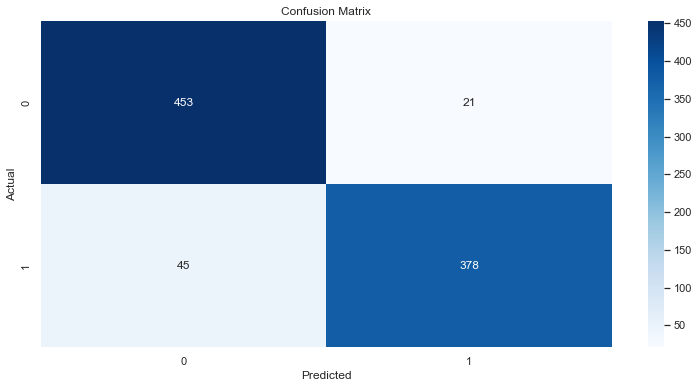

In [77]:
y_pred = cross_val_predict(clf, X, y, cv=10)
sorted_labels=[0, 1]
matrix=confusion_matrix(y, y_pred, labels=sorted_labels)

plt.figure(figsize=(12.8,6))
sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

plt.show()

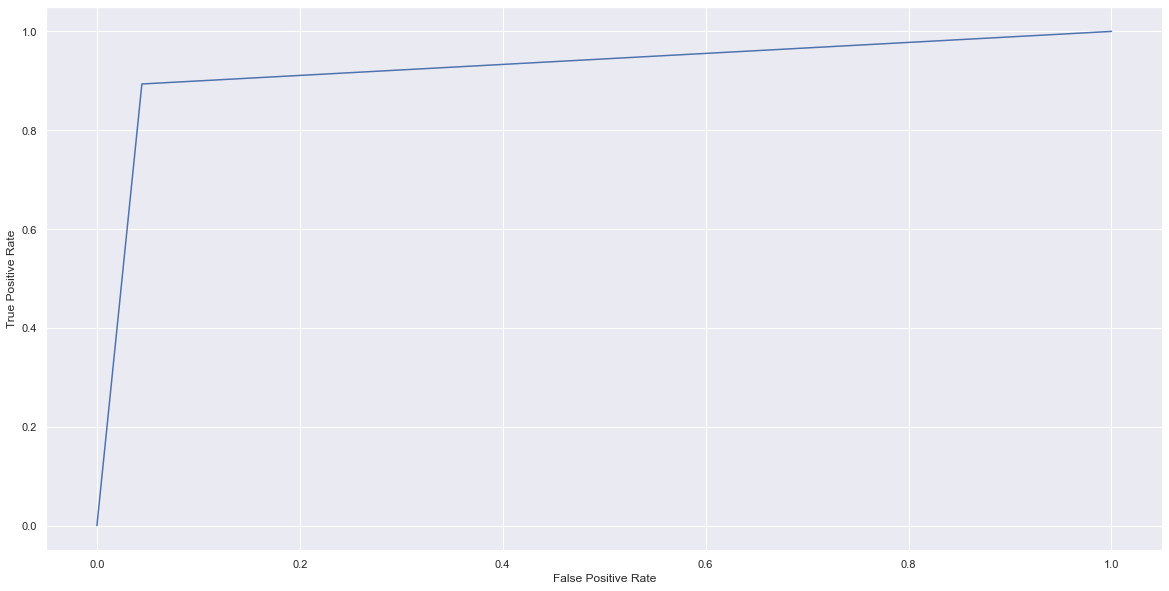

In [78]:
fpr, tpr, _ =  metrics.roc_curve(y,  y_pred)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [79]:
print("Recall Score : ",recall_score(y, y_pred, average='macro'))
print("Precision Score : ",precision_score(y, y_pred, average='macro'))
print("F1_score : ",f1_score(y, y_pred, average='macro'))
print("Accuracy Score : ",accuracy_score(y, y_pred))

Recall Score :  0.9246566119041206
Precision Score :  0.9285034876347495
F1_score :  0.9259033973145895
Accuracy Score :  0.9264214046822743


## 4. Logistic Regression


Logistička regresija je proces modeliranja vjerojatnosti diskretnog ishoda s obzirom na ulaznu varijablu.

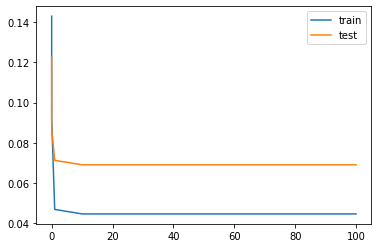

In [20]:
from sklearn.linear_model import LogisticRegression
C = [0.001, 0.01,  1, 10, 100]
entropy_train = []
entropy_test = []
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                   test_size=0.5)


for c in C:
    model = LogisticRegression(max_iter=10000,C=c)
    model.fit(X_train, y_train)
    h = model.predict(X_train)
    h_test = model.predict(X_test)
    entropy_train.append(zero_one_loss(y_train, h))
    entropy_test.append(zero_one_loss(y_test, h_test))

plt.plot(C, entropy_train,label='train')
plt.plot(C, entropy_test,label='test')
plt.legend(loc="best")
plt.show()


In [21]:
print(entropy_train)
print(entropy_test)

[0.1428571428571429, 0.0915178571428571, 0.046875, 0.044642857142857095, 0.044642857142857095]
[0.12249443207126953, 0.0868596881959911, 0.07126948775055675, 0.06904231625835189, 0.06904231625835189]


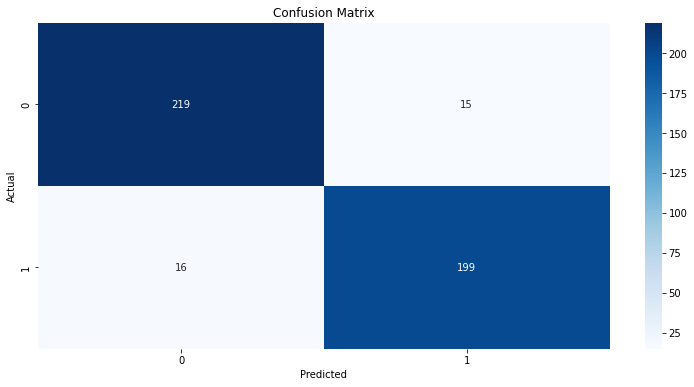

In [23]:
model = LogisticRegression(max_iter=10000,C=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sorted_labels=[0, 1]
matrix=confusion_matrix(y_test, y_pred, labels=sorted_labels)

plt.figure(figsize=(12.8,6))
sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()


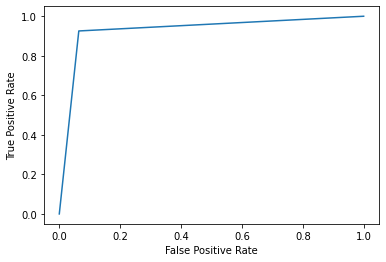

In [25]:
fpr, tpr, _ =  metrics.roc_curve(y_test,  y_pred)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
print("Recall Score : ",recall_score(y_test, y_pred, average='macro'))
print("Precision Score : ",precision_score(y_test, y_pred, average='macro'))
print("F1_score : ",f1_score(y_test, y_pred, average='macro'))
print("Accuracy Score : ",accuracy_score(y_test, y_pred))

Recall Score :  0.9307394156231366
Precision Score :  0.9309107178365481
F1_score :  0.9308204233577367
Accuracy Score :  0.9309576837416481


## 5. SVM

Strojevi za potporne vektore (SVM) skup su nadziranih metoda učenja koje se koriste za klasifikaciju, regresiju i otkrivanje izvanrednih vrijednosti.


In [28]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   test_size=0.5)

parameters = {'kernel':('linear', 'rbf', 'poly'),'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, ], 'gamma' : np.logspace(-3, -1, 1, 3)}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
grid_predictions = clf.predict(X_test)
svm_acc = accuracy_score(y_test, grid_predictions) 
svm_f1 = (f1_score(y_test, grid_predictions, average='weighted') )
print(svm_acc)
print(svm_f1)

SVC(C=0.01, gamma=0.001, kernel='linear')
0.9465478841870824
0.9465215874634395


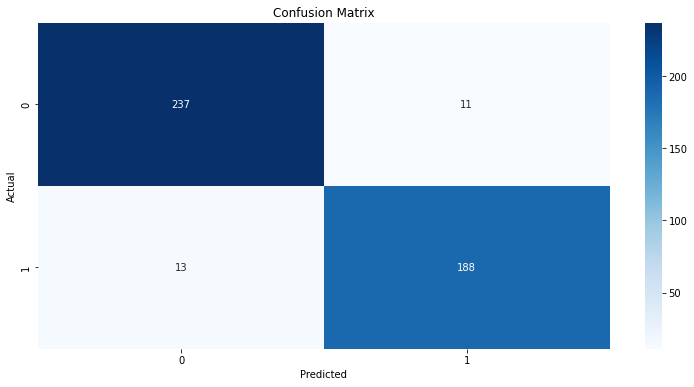

In [29]:

sorted_labels=[0, 1]
matrix=confusion_matrix(y_test, grid_predictions, labels=sorted_labels)

plt.figure(figsize=(12.8,6))
sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

plt.show()

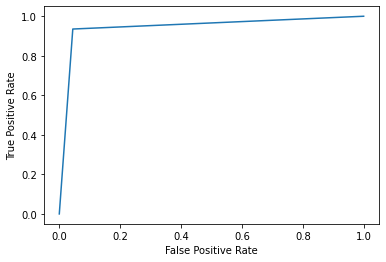

In [30]:
fpr, tpr, _ =  metrics.roc_curve(y_test, grid_predictions)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
print("Recall Score : ",recall_score(y_test, grid_predictions, average='macro'))
print("Precision Score : ",precision_score(y_test, grid_predictions, average='macro'))
print("F1_score : ",f1_score(y_test, grid_predictions, average='macro'))
print("Accuracy Score : ",accuracy_score(y_test, grid_predictions))

Recall Score :  0.9454842721874499
Precision Score :  0.9463618090452262
F1_score :  0.9459036144578313
Accuracy Score :  0.9465478841870824


Za svaki model je izračunat recall score,precision score,F1 score, accuracy score, istreniran model, nacrtana krivulja te matrica konfuzije. Vidimo da su zapravo svi modeli jako dobro reagirali i dali jako visoku točnost. Prilikom treniranja je korišten 10 kFold.
Točnosti svih modela su dosta slične kao i one u članku no postoji i dalje razlika koja je posljedica činjenice da nije korišten potpuno isti skup podataka kao što je korišten u članku.

## 6.KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
grid_params = { 'n_neighbors' : [5,7,9,11,13,15, 20, 30, 50]}
gs = GridSearchCV(KNeighborsClassifier(), grid_params)
g_res = gs.fit(X_train, y_train)
print(g_res.best_score_)
print(g_res.best_params_)

0.8596190476190475
{'n_neighbors': 5}


In [48]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))
knn_f1 = (f1_score(y_test, knn.predict(X_test)))
print(knn_acc)
print(knn_f1)




0.8851851851851852
0.8784313725490195


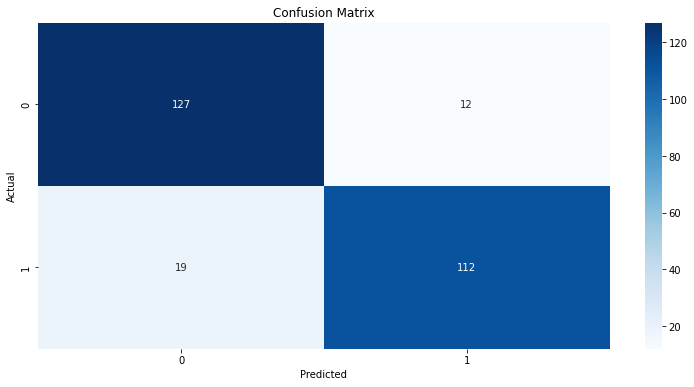

In [49]:
sorted_labels=[0, 1]
matrix=confusion_matrix(y_test, knn.predict(X_test), labels=sorted_labels)

plt.figure(figsize=(12.8,6))
sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

plt.show()